# Introduction

### Dataset - RealEstate transactions of a place named Sacramento 

I got this Data set From http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv 

The Dataset Consists of Street name, City, Zip code, State, Area , Type of building, Sale date, Price, Latitude and Longitude

I'm Trying to pedict and show the Price range of buildings and factors which are affecting the Price.


In [1]:
!pip install gmplot

     |████████████████████████████████| 122kB 2.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [2]:
#!pip install shapely.geometry
!pip install geopandas
#!pip install shapely==1.2.8

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 10.8MB 38.2MB/s 
     |████████████████████████████████| 17.9MB 32.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import io
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import folium
from xml.etree import ElementTree

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
#Reading csv using pandas
data_new = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')

In [5]:
#Viewing data
data_new.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
#Finding the missing values
data_new.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
#description of data to verify the missing values
data_new.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
#description of data to verify the missing values
data_new.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [0]:
#Dropping coloums with no required information
data_new = data_new.drop('sale_date',axis=1)
data_new = data_new.drop('street',axis=1)
data_new = data_new.drop('city',axis=1)
data_new = data_new.drop('state',axis=1)
data_new = data_new.drop('zip',axis=1)

In [0]:
# Feature Engineering
# Creating a Target Value
price_range = 884790 - 2000
data_new['target'] = 0
range1 = price_range/3
range2 = 2*price_range/3

In [11]:
for i in range(0,len(data_new)):
    if data_new['price'][i] <= range1:
        data_new['target'][i] = 1
        #data_range1 = data_new[i]
    if range1 < data_new['price'][i] <= range2:
        data_new['target'][i] = 2
        #data_range2 = data_new[i]
    if data_new['price'][i] > range2:
        data_new['target'][i] = 3
        #data_range3 = data_new[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [0]:
data_new['type_number'] = 0

In [13]:
for i in range(0,len(data_new)):
    if data_new.type[i]=='Residential':
        data_new.type_number[i] = 1    
    if data_new.type[i]=='Condo':
        data_new.type_number[i] = 2
    if data_new.type[i]=='Multi-Family':
        data_new.type_number[i] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
def clr(point):
  if data_new['type'][point] == 'Residential':
    return 'red'
  elif data_new['type'][point] == 'Condo':
    return 'green'
  else :
    return 'blue'
   

In [15]:
locations = data_new[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

map = folium.Map(location=[38.53, -121.48], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup=data_new['type'][point],icon=folium.Icon(icon='cloud',color=clr(point))).add_to(map)
#map.create_map('osm2.html')
map

In [0]:
#removing the rows without proper data
#data contains non zero areas are copyed to a new Data Frame
data_new= data_new[data_new.sq__ft != 0]

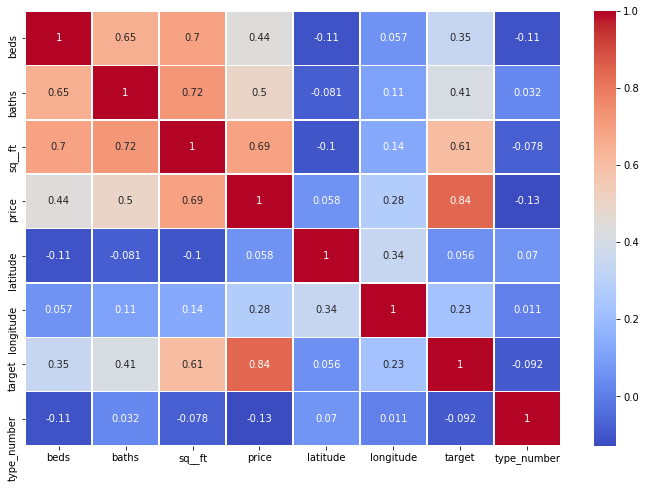

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

In [0]:
#Finding All the building with a single type
data_Res= data_new[data_new.type == 'Residential']
data_Con= data_new[data_new.type == 'Condo']
data_Mul= data_new[data_new.type == 'Multi-Family']


In [19]:
print(len(data_Res))


759


In [0]:
data_new = data_new.drop('type',axis=1)

In [21]:
# finding the type of buildings
data_new.type_number.unique()

array([1, 2, 3])

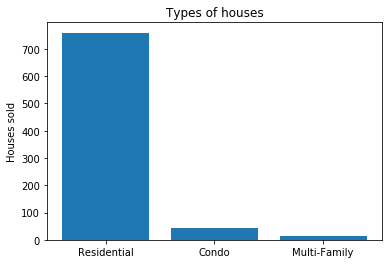

In [22]:
# Data Visualization
#plotting the number of houses in each type

objects = ('Residential','Condo','Multi-Family')
y_pos = np.arange(len(objects))
performance = [len(data_Res),len(data_Con),len(data_Mul)]
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.ylabel('Houses sold')
plt.title('Types of houses')
 
plt.show()

Text(0.5, 1.0, 'No of beds vs Price of Residential houses')

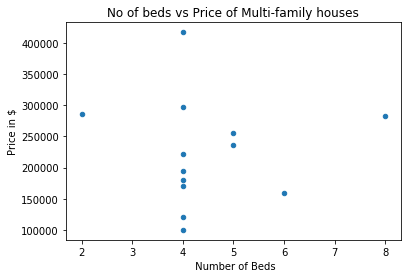

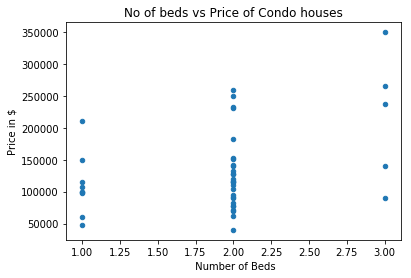

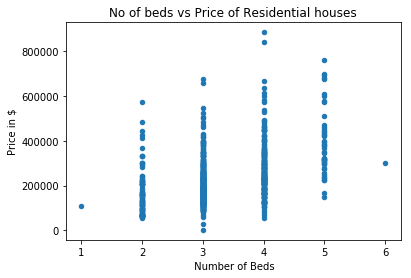

In [23]:
#Getting plots for individual type of houses
#due to this we can find the range of how many bedded houses in each type of houses

data_Mul.plot.scatter(x='beds',y='price')
plt.xlabel(' Number of Beds')
plt.ylabel('Price in $')
plt.title('No of beds vs Price of Multi-family houses')

data_Con.plot.scatter(x='beds',y='price')
plt.xlabel(' Number of Beds')
plt.ylabel('Price in $')
plt.title('No of beds vs Price of Condo houses')

data_Res.plot.scatter(x='beds',y='price')
plt.xlabel(' Number of Beds')
plt.ylabel('Price in $')
plt.title('No of beds vs Price of Residential houses')

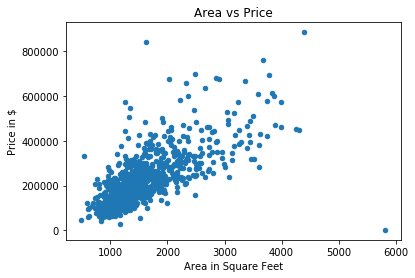

In [24]:
# variation for square feet vs price
data_new.plot.scatter(x='sq__ft',y='price')
plt.title('Area vs Price')
plt.ylabel('Price in $')
plt.xlabel('Area in Square Feet')

plt.show()

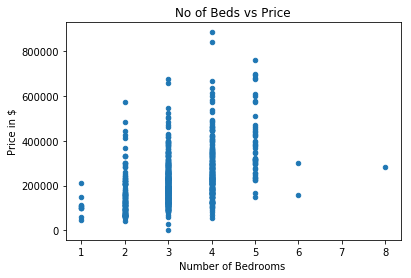

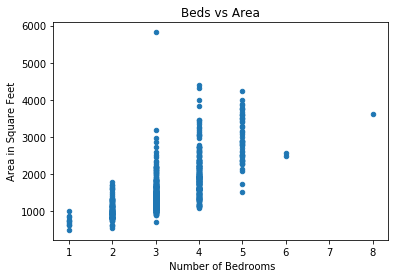

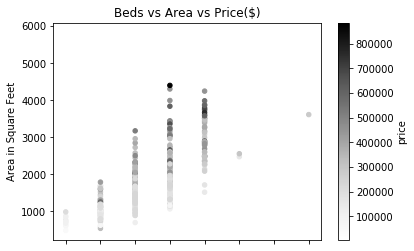

In [25]:
# factors infludencing prices
data_new.plot.scatter(x='beds',y='price')
plt.title('No of Beds vs Price')
plt.ylabel('Price in $')
plt.xlabel('Number of Bedrooms ')

data_new.plot.scatter(x ='beds', y ='sq__ft')
plt.title('Beds vs Area')
plt.ylabel('Area in Square Feet')
plt.xlabel(' Number of Bedrooms')

data_new.plot.scatter(x='beds',y='sq__ft', c='price')
plt.title('Beds vs Area vs Price($)')
plt.ylabel('Area in Square Feet')
plt.xlabel(' Number of Beds')

plt.show()

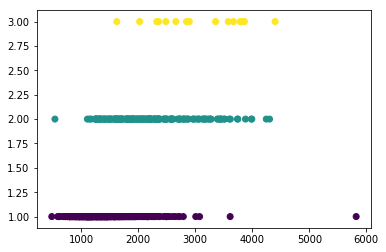

In [26]:
plt.scatter(y=data_new['target'],x=data_new['sq__ft'],c=data_new['target'])

In [0]:
a = []
b = []

In [0]:
data_new = data_new.drop('price',axis=1)

## Linear Regression

In [29]:
lr = LinearRegression()
train_df, test_df = train_test_split(data_new,test_size=.5)

p = lr.fit(train_df.drop('target', axis=1), train_df['target'])
a.append(sum(lr.predict(train_df.drop('target',axis=1))==train_df['target'])/len(train_df))
b.append(sum(lr.predict(test_df.drop('target',axis=1))==test_df['target'])/len(test_df))
print('Train :',sum(lr.predict(train_df.drop('target',axis=1))==train_df['target'])/len(train_df))
print('Test :',sum(lr.predict(test_df.drop('target',axis=1))==test_df['target'])/len(test_df))
#print(accuracy_score(lr.predict(test_df.drop('target',axis=1)),test_df['target']))

Train : 0.0
Test : 0.0


## Logistic Regression

In [30]:
#Logistic Regression

train_df, test_df = train_test_split(data_new,test_size=.2,random_state=21)

lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1), train_df['target'])

a.append(sum(lr.predict(train_df.drop('target',axis=1))==train_df['target'])/len(train_df))
b.append((accuracy_score(lr.predict(test_df.drop('target',axis=1)),test_df['target'])))

print('Train :' , sum(lr.predict(train_df.drop('target',axis=1))==train_df['target'])/len(train_df))
print('Test : ',accuracy_score(lr.predict(test_df.drop('target',axis=1)),test_df['target']))

Train : 0.8463901689708141
Test :  0.7852760736196319


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
lr.score(test_df.drop(columns=['target']),test_df['target'])

0.7852760736196319

In [32]:
print(confusion_matrix(lr.predict(test_df.drop('target',axis=1)),test_df['target']))

[[120  27   0]
 [  4   8   4]
 [  0   0   0]]


## Applying PCA

In [0]:
# PCA with 30 components

pca = PCA(n_components = 3)
pca.fit(data_new)
PCA_X = pca.transform(data_new)

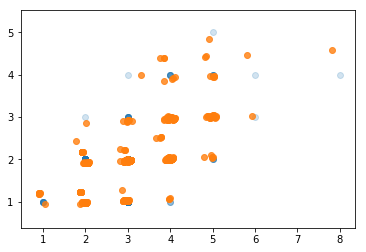

In [34]:
X_new = pca.inverse_transform(PCA_X)
plt.scatter(data_new.iloc[:, 0].values, data_new.iloc[:, 1].values, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [35]:
PCA_X.shape

(814, 3)

In [36]:
# ploting expected variance
c = pca.explained_variance_ratio_
c

array([9.99998036e-01, 9.42993169e-07, 4.16442700e-07])

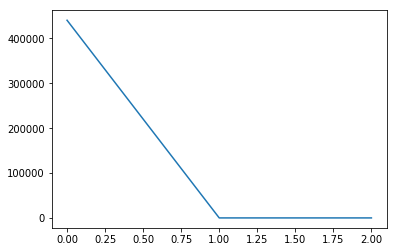

In [37]:
c = pca.explained_variance_
plt.plot(c)

In [38]:
print(data_new.columns[c.argmax()])

beds


## K means

In [39]:
# kmeans

k = KMeans(3, random_state=1)
kcluster = k.fit_transform(train_df.drop('target',axis=1))
a.append(accuracy_score(train_df['target'], k.predict(train_df.drop('target',axis=1))))
print('Train:',accuracy_score(train_df['target'], k.predict(train_df.drop('target',axis=1))))

# Test accuracy

b.append(accuracy_score(test_df['target'], k.predict(test_df.drop('target',axis=1))))
print('Test :',accuracy_score(test_df['target'], k.predict(test_df.drop('target',axis=1))))

Train: 0.2780337941628264
Test : 0.22699386503067484


## Random Forest

In [40]:
# random forest

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
clf.fit(train_df.drop(columns=['target']),train_df['target'])
a.append(accuracy_score(clf.predict(train_df.drop(['target'],axis=1)),train_df['target']))
print('Train :',accuracy_score(clf.predict(train_df.drop(['target'],axis=1)),train_df['target']))

Train : 0.8463901689708141


In [41]:
b.append(accuracy_score(clf.predict(test_df.drop(columns=['target'])),test_df['target']))
print('Test :',accuracy_score(clf.predict(test_df.drop(columns=['target'])),test_df['target']))

Test : 0.7914110429447853


In [42]:
print(clf.feature_importances_)

[0.05627483 0.27656861 0.42858102 0.0692597  0.15885871 0.01045713]


In [43]:
data_new

,beds,baths,sq__ft,latitude,longitude,target,type_number
0,2,1,836,38.631913,-121.434879,1,1
1,3,1,1167,38.478902,-121.431028,1,1
2,2,1,796,38.618305,-121.443839,1,1
3,2,1,852,38.616835,-121.439146,1,1
4,2,1,797,38.519470,-121.435768,1,1
5,3,1,1122,38.662595,-121.327813,1,2
6,3,2,1104,38.681659,-121.351705,1,1
7,3,1,1177,38.535092,-121.481367,1,1
8,2,2,941,38.621188,-121.270555,1,2
9,3,2,1146,38.700909,-121.442979,1,1


## LASSO Regression

In [44]:
#Lazzo Regression

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_df.drop(columns=['target']),train_df['target'])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
a.append(lasso.score(train_df.drop(columns=['target']),train_df['target']))
b.append(lasso.score(test_df.drop(columns=['target']),test_df['target']))

print('Train :',lasso.score(train_df.drop(columns=['target']),train_df['target']))
print('Test :',lasso.score(test_df.drop(columns=['target']),test_df['target']))

Train : 0.4049131834767382
Test : 0.23758518640052081


In [0]:
for i in range(0,5):
  a[i] = a[i]*100 
  b[i] = b[i]*100

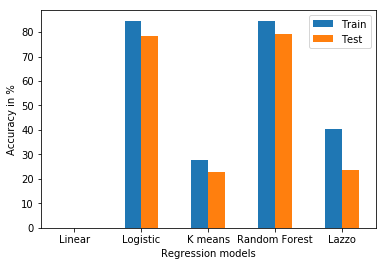

In [47]:
index = ['Linear', 'Logistic', 'K means',
          'Random Forest', 'Lazzo']
df = pd.DataFrame({'Train': a,
                    'Test': b}, index=index)
ax = df.plot.bar(rot=0)
plt.xlabel('Regression models')
plt.ylabel('Accuracy in %')
plt.show()